In [1]:
import torch
from tqdm import tqdm

In [2]:
import os
import sys

sys.path.append(os.path.pardir)

In [3]:
from cpm_torch.CPM_Image import *
from cpm_torch.CPM import *

In [ ]:
if torch.cuda.is_available():
    device = torch.device("cuda")
    print(f"GPUを利用します: {torch.cuda.get_device_name(0)}")
else:
    device = torch.device("cpu")
    print("CPUを利用します")

config = CPM_config(
    l_A=1.0,  # 面積エネルギー項の係数λ_A
    l_L=1.0,  # 周囲長エネルギー項の係数λ_L
    A_0=150.0,  # 目標細胞面積 A_0
    L_0=82.0,  # 目標細胞周囲長 L_0
    T=1.0,  # 温度パラメータ T
)
print(config.__dict__)

GPUを利用します: NVIDIA H100 PCIe
{'size': (256, 256), 'dim': 2, 'height': 256, 'width': 256, 'depth': 1, 'l_A': 1.0, 'l_L': 1.0, 'A_0': 150.0, 'L_0': 20.0, 'T': 1.0}


### 初期条件

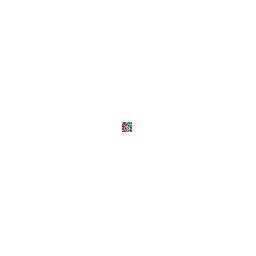

In [5]:
cpm = CPM(config, device)  # CPMのインスタンスを作成

for x in range(10):
    for y in range(10):
        cpm.add_cell(x + 122, y + 122)
imshow_map(cpm.map_tensor)  # 初期状態を表示

### シュミレーション

ステップ:   0%|          | 0/500 [00:00<?, ?it/s]

ステップ: 100%|██████████| 500/500 [00:08<00:00, 59.97it/s]


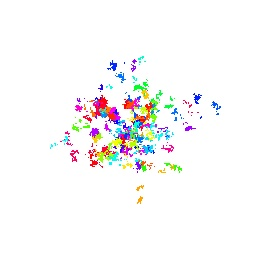

In [6]:

step = 500      # シミュレーションのエポック数
mcs_per_step = 1 # 1エポックあたりのCPMステップ数
diffusion_steps = 5 # 1 CPMステップあたりの拡散ステップ数

# オプション: 動画記録用ライターの初期化
video_filename = '../results/cpm_torch_jp.mp4'
writer = LoopWriter(filename=video_filename, fps=10) # ループ動画ライター

# --- シミュレーション実行 ---
for i in tqdm(range(step), desc="ステップ"):
    for k in range(mcs_per_step):
        cpm.cpm_mcs_step()
    
    # --- 動画フレーム追加 ---
    frame_rgb = map_tensor_to_rgb(cpm.map_tensor)
    writer.add(frame_rgb)

writer.close()
imshow_map(cpm.map_tensor)